In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [21]:
iris=load_iris()
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
df['target']=iris.target

In [24]:
df['flower_name']=df['target'].apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [6]:
df['target'].unique

<bound method Series.unique of 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64>

In [25]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [74]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        
    def fit(self, X):
        # Convert DataFrame to numpy array if input is DataFrame
        if isinstance(X, pd.DataFrame):
            X = X.values
        
        # 1. Data Preprocessing
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        
        # 2. Compute the Covariance Matrix
        covariance_matrix = np.cov(X.T)
        
        # 3. Compute the Eigenvectors and Eigenvalues
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
        
        # 4. Select Principal Components
        idx = np.argsort(eigenvalues)[::-1]
        self.components = eigenvectors[:, idx[:self.n_components]]
        
    def transform(self, X):
        # Convert DataFrame to numpy array if input is DataFrame
        if isinstance(X, pd.DataFrame):
            X = X.values
        
        # Project data onto the new feature space
        X = X - self.mean
        transformed_data = np.dot(X, self.components)
        
        # If the input was a DataFrame, return a DataFrame
        if isinstance(X, pd.DataFrame):
            return pd.DataFrame(transformed_data, columns=[f'PC{i+1}' for i in range(transformed_data.shape[1])], index=X.index)
        else:
            return pd.DataFrame(transformed_data, columns=[f'PC{i+1}' for i in range(transformed_data.shape[1])])


In [54]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [55]:
df.columns


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'flower_name'],
      dtype='object')

In [56]:
# Drop the 'target' column from the original DataFrame
X = df.drop(['target','flower_name'], axis=1)
X.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [57]:
pca=PCA(n_components=2)
pca.fit(X)

In [60]:
new_df=pca.transform(X)
new_df['target']=iris.target

In [61]:
new_df.head()

,PC1,PC2,target
0,-2.684126,-0.319397,0
1,-2.714142,0.177001,0
2,-2.888991,0.144949,0
3,-2.745343,0.318299,0
4,-2.728717,-0.326755,0


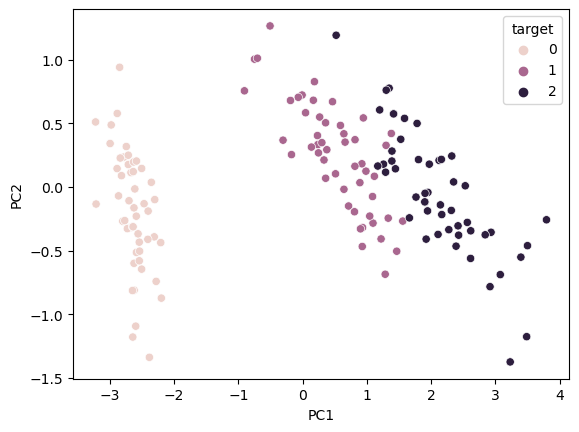

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=new_df,x='PC1',y='PC2',hue='target')
plt.show()

In [64]:
pca=PCA(n_components=3)
pca.fit(X)

In [65]:
new_df=pca.transform(X)
new_df['target']=iris.target
new_df.head()

,PC1,PC2,PC3,target
0,-2.684126,-0.319397,-0.027915,0
1,-2.714142,0.177001,-0.210464,0
2,-2.888991,0.144949,0.017900,0
3,-2.745343,0.318299,0.031559,0
4,-2.728717,-0.326755,0.090079,0


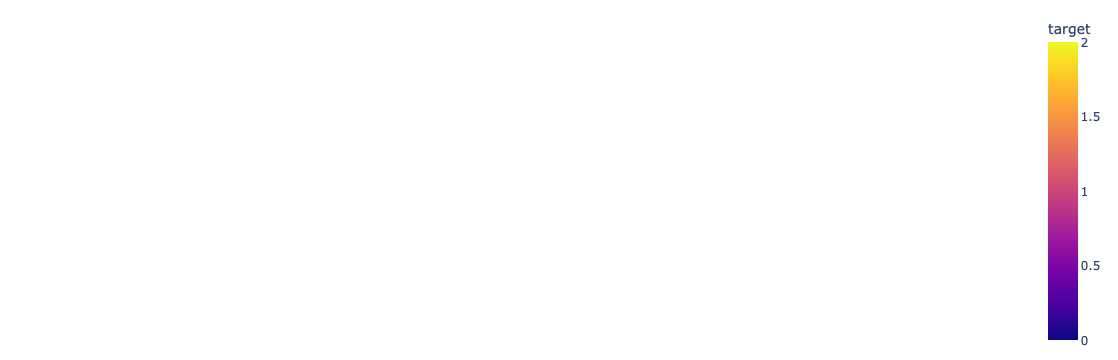

In [73]:
import plotly.express as px

fig = px.scatter_3d(new_df, x='PC1', y='PC2', z='PC3', color='target')
fig.update_layout(scene=dict(
                    xaxis_title='PC1',
                    yaxis_title='PC2',
                    zaxis_title='PC3'),
                  width=900,
                  margin=dict(r=20, b=10, l=10, t=10))
fig.show()

